In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('wbes_sintetico.csv')

# Seleccionar columnas relevantes


columns_to_keep = [
    'sales_annual_usd',
    'labor_productivity_usd_per_employee',
    'employees',
    'firm_age_years',
    'access_finance',
    'training',
    'competition_level',
    'exporter',
    'successful',       
    'sector',           
    'digital_payments'
]

df_clean = df[columns_to_keep].copy()

#  Eliminar datos nulos
print(f"Dimensiones originales: {df_clean.shape}")
df_clean = df_clean.dropna()
print(f"Dimensiones tras limpieza: {df_clean.shape}")

# Reiniciar el índice para evitar fallos
df_clean.reset_index(drop=True, inplace=True)

#  Mostrar resultado y guardar
print(df_clean.head())
df_clean.to_csv('wbes_limpio.csv', index=False)

Dimensiones originales: (1200, 11)
Dimensiones tras limpieza: (1035, 11)
   sales_annual_usd  labor_productivity_usd_per_employee  employees  \
0      42879.327130                          5374.714150       13.0   
1      54570.897174                          4728.282631        9.0   
2      56311.260030                          3104.627628       15.0   
3      93419.359675                          3129.017055       25.0   
4      24608.889361                          2824.645056        9.0   

   firm_age_years  access_finance  training competition_level  exporter  \
0            10.0             1.0       1.0             Media         0   
1             6.0             0.0       0.0              Baja         0   
2            10.0             0.0       0.0              Baja         1   
3            12.0             0.0       1.0              Baja         1   
4             9.0             0.0       0.0              Baja         0   

   successful       sector  digital_payments  
0 

--- Resultados de Regresión Lineal (Target: Ventas Anuales) ---
MSE (Error Cuadrático Medio): 232,578,828.66
R2 (Varianza Explicada): 0.4611

Coeficientes:
                   Variable  Coeficiente
2            access_finance  8096.975871
9    competition_level_Baja  7801.784516
4                  exporter  6495.261014
3                  training  6307.749612
6        sector_Manufactura  4694.440694
10  competition_level_Media  4544.219749
8         sector_Tecnologia  4427.125270
7          sector_Servicios  2352.631835
5          digital_payments  1226.042583
0                 employees  1162.806456
1            firm_age_years   533.707039


/var/folders/fd/hp1xpjrn23l638t9gnt4lmcc0000gn/T/ipykernel_9717/2780955492.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=coefficients, palette='viridis')


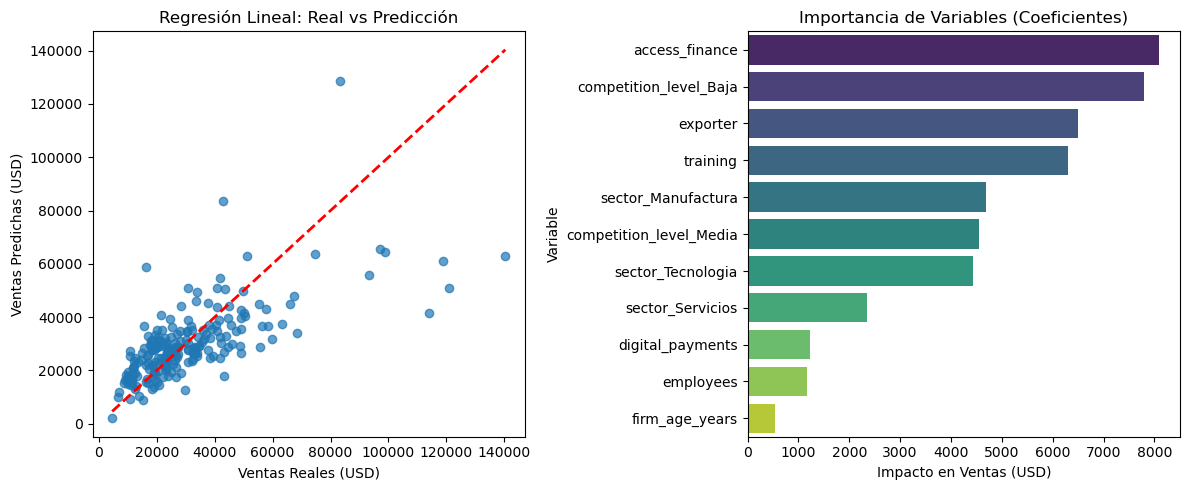

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#  Cargar y limpiar datos
df = pd.read_csv('wbes_sintetico.csv')
columns_to_keep = [
    'sales_annual_usd', 'labor_productivity_usd_per_employee', 'employees',
    'firm_age_years', 'access_finance', 'training', 'competition_level',
    'exporter', 'sector', 'digital_payments'
]
df_clean = df[columns_to_keep].dropna().reset_index(drop=True)

#  Preprocesamiento

df_encoded = pd.get_dummies(df_clean, columns=['sector', 'competition_level'], drop_first=True)

# Definir X (Variables predictoras) e y (Variable objetivo: sales_annual_usd)
X = df_encoded.drop(['sales_annual_usd', 'labor_productivity_usd_per_employee'], axis=1)
y = df_encoded['sales_annual_usd']

#  Split Train/Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Entrenar Modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

#  Predicciones y Métricas
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_})
coefficients = coefficients.sort_values(by='Coeficiente', ascending=False)

print("--- Resultados de Regresión Lineal (Target: Ventas Anuales) ---")
print(f"MSE (Error Cuadrático Medio): {mse:,.2f}")
print(f"R2 (Varianza Explicada): {r2:.4f}")
print("\nCoeficientes:")
print(coefficients)

#  Gráficas
plt.figure(figsize=(12, 5))

#  Predicción vs Realidad
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Ventas Reales (USD)')
plt.ylabel('Ventas Predichas (USD)')
plt.title('Regresión Lineal: Real vs Predicción')

# Importancia de Variables (Coeficientes)
plt.subplot(1, 2, 2)
sns.barplot(x='Coeficiente', y='Variable', data=coefficients, palette='viridis')
plt.title('Importancia de Variables (Coeficientes)')
plt.xlabel('Impacto en Ventas (USD)')

plt.tight_layout()
plt.savefig('linear_regression_results.png')

## Analiza y responde ¿qué variables explican mejor las ventas o la productividad de una empresa? Identifica la variable dependiente (variables objetivos) y variables independientes (variables predictoras)

### R : Para este análisis, la variable dependiente es el monto de Ventas Anuales (USD) y las variables independientes son las características operativas de la empresa (como financiamiento, capacitación y competencia). Según el modelo lineal, las variables que mejor explican el éxito son el Acceso a Financiamiento, operar con Baja Competencia y ser Exportador, indicando que el capital y el posicionamiento de mercado son los factores más determinantes.

Promedio de Ventas: $29,803.67
Distribución de Éxito (Calculado):
calculated_success
0    0.600966
1    0.399034
Name: proportion, dtype: float64

--- Resultados Regresión Logística ---
Accuracy: 0.7568
AUC: 0.8249

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.73      0.92      0.82       151
           1       0.83      0.53      0.64       108

    accuracy                           0.76       259
   macro avg       0.78      0.72      0.73       259
weighted avg       0.77      0.76      0.74       259


Interpretación (Odds Ratios - Probabilidad de Éxito):
                  Variable  Coeficiente  Odds Ratio
2                 exporter     1.014677    2.758472
3           access_finance     0.829041    2.291121
1                 training     0.817844    2.265609
4   competition_level_Baja     0.753060    2.123488
5  competition_level_Media     0.587612    1.799685
0                employees     0.176400    1.192916


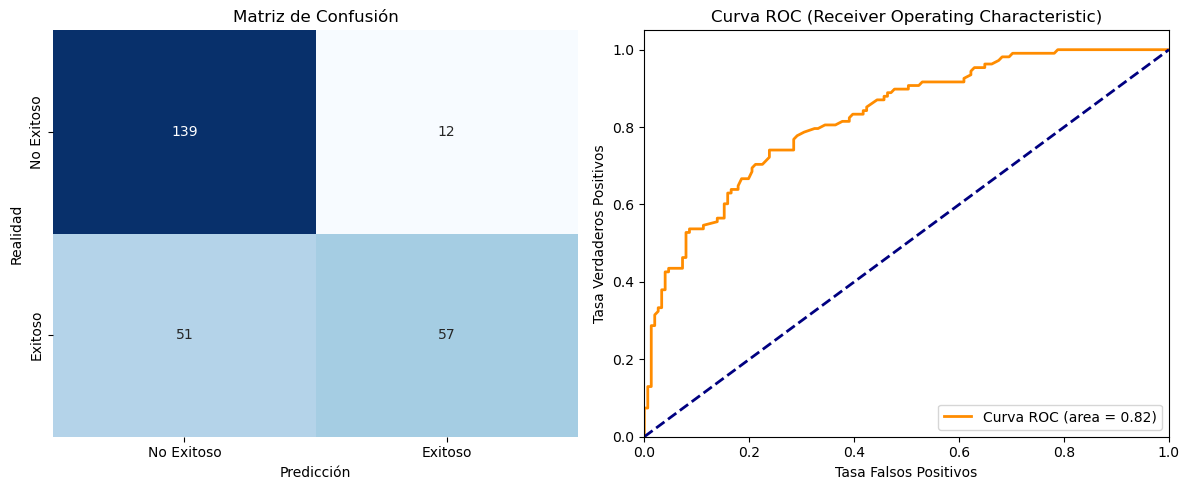

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report

#  Cargar datos limpios
df = pd.read_csv('wbes_limpio.csv')

# Ingeniería de Características crear variables binarias

mean_sales = df['sales_annual_usd'].mean()
df['calculated_success'] = (df['sales_annual_usd'] > mean_sales).astype(int)

# Verificar cuántos exitosos tenemos
print(f"Promedio de Ventas: ${mean_sales:,.2f}")
print(f"Distribución de Éxito (Calculado):\n{df['calculated_success'].value_counts(normalize=True)}")

#  Selección de Variables Predictoras

features = ['employees', 'training', 'exporter', 'access_finance', 'competition_level']
X = df[features].copy()
y = df['calculated_success']

# Preprocesamiento: Convertir competition_level a dummy/numérico
X = pd.get_dummies(X, columns=['competition_level'], drop_first=True)

#  Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#  Entrenamiento del Modelo
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#  Predicciones y Evaluación
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1] # Probabilidad para clase 1

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print(f"\n--- Resultados Regresión Logística ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {roc_auc:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Interpretación de Coeficientes (Odds Ratios)
coefs = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': log_reg.coef_[0],
    'Odds Ratio': np.exp(log_reg.coef_[0])
}).sort_values(by='Odds Ratio', ascending=False)

print("\nInterpretación (Odds Ratios - Probabilidad de Éxito):")
print(coefs)

#  Visualización
plt.figure(figsize=(12, 5))

# Matriz de Confusión
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.xticks([0.5, 1.5], ['No Exitoso', 'Exitoso'])
plt.yticks([0.5, 1.5], ['No Exitoso', 'Exitoso'])

# Curva ROC
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")

plt.tight_layout()
plt.savefig('logistic_regression_results.png')

## Analiza y responde ¿se puede clasificar si una empresa es “exitosa” según sus características?
### Sí, el análisis demuestra que es posible clasificar a las empresas como "exitosas" con un 75.7% de precisión y un AUC de 0.82. El modelo logístico identifica patrones claros donde características como ser exportador , tener acceso a financiamiento y ofrecer capacitación son los factores determinantes que permiten predecir el éxito empresarial.

Entrenando Red Bayesiana...

--- Resultados de Inferencia Causal ---
Probabilidad de Éxito dado Financiamiento=SÍ: 40.75%
Probabilidad de Éxito dado Financiamiento=NO: 39.49%
Probabilidad de Éxito (Financiamiento + Capacitación): 49.25%


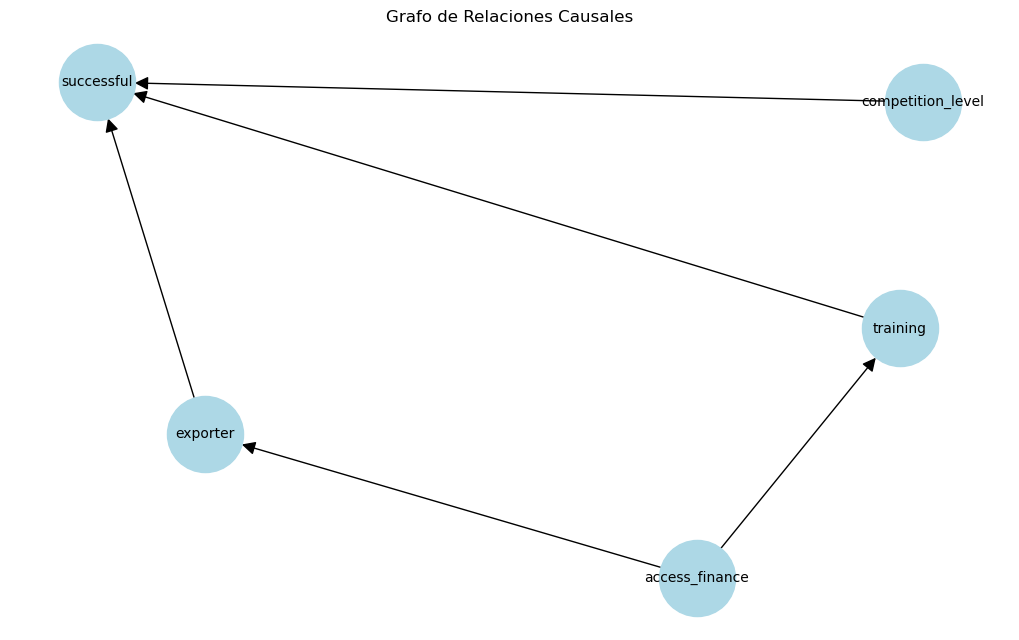

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product


# CLASE NECESARIA: Red Bayesiana (Funciona sin instalar pgmpy), no me funciono pgmpy, asi que este codigo esta clase es para eso

class SimpleBayesianNetwork:
    def __init__(self, edges):
        self.edges = edges
        self.parents = {child: [] for parent, child in edges}
        for parent, child in edges:
            if parent not in self.parents: self.parents[parent] = []
            self.parents[child].append(parent)
        self.nodes = set([n for e in edges for n in e])
        self.cpts = {} 
        self.states = {} 

    def fit(self, data):
        
        for node in self.nodes:
            self.states[node] = sorted(data[node].unique())
            parents = self.parents[node]
            
            if not parents:
                counts = data[node].value_counts(normalize=True).sort_index()
                self.cpts[node] = counts
            else:
                cpt = data.groupby(parents)[node].value_counts(normalize=True).unstack(fill_value=0)
                self.cpts[node] = cpt

    def _get_prob(self, node, val, evidence_dict):
        parents = self.parents[node]
        if not parents:
            return self.cpts[node].get(val, 0)
        
        parent_vals = tuple(evidence_dict[p] for p in parents)
        if len(parents) == 1:
            parent_vals = parent_vals[0]
            
        try:
            return self.cpts[node].loc[parent_vals, val]
        except (KeyError, TypeError):
            # Si una combinación específica no existe en los datos, asumimos probabilidad uniforme baja
            return 1.0 / len(self.states[node])

    def query(self, target_var, evidence={}):
       
        all_vars = sorted(list(self.nodes))
        state_space = [self.states[v] for v in all_vars]
        combinations = list(product(*state_space))
        
        joint_dist = []
        for combo in combinations:
            row_dict = dict(zip(all_vars, combo))
            
            # Filtrar filas que contradicen la evidencia
            consistent = True
            for ev_var, ev_val in evidence.items():
                if row_dict[ev_var] != ev_val:
                    consistent = False
                    break
            if not consistent:
                joint_dist.append(0)
                continue
            
            # Calcular probabilidad conjunta de la fila
            p_row = 1.0
            for node in self.nodes:
                p_row *= self._get_prob(node, row_dict[node], row_dict)
            joint_dist.append(p_row)

        df_joint = pd.DataFrame(combinations, columns=all_vars)
        df_joint['prob'] = joint_dist
        
        total_prob = df_joint['prob'].sum()
        if total_prob == 0:
            return pd.Series([], dtype=float)
            
        return df_joint.groupby(target_var)['prob'].sum() / total_prob

# EJECUCIÓN


#  Preparar datos 
if 'successful' not in df_clean.columns:
    mean_sales = df_clean['sales_annual_usd'].mean()
    df_clean['successful'] = (df_clean['sales_annual_usd'] > mean_sales).astype(int)

bayes_vars = ['successful', 'training', 'access_finance', 'competition_level', 'exporter']
df_bayes = df_clean[bayes_vars].copy()

# Definir Estructura Causal 
edges = [
    ('access_finance', 'training'),
    ('access_finance', 'exporter'),
    ('training', 'successful'),
    ('exporter', 'successful'),
    ('competition_level', 'successful')
]

#  Entrenar Modelo
print("Entrenando Red Bayesiana...")
bn = SimpleBayesianNetwork(edges)
bn.fit(df_bayes)

#  Responder Preguntas (Inferencia)
print("\n--- Resultados de Inferencia Causal ---")


p_con_fin = bn.query('successful', evidence={'access_finance': 1}).get(1, 0)
p_sin_fin = bn.query('successful', evidence={'access_finance': 0}).get(1, 0)
print(f"Probabilidad de Éxito dado Financiamiento=SÍ: {p_con_fin:.2%}")
print(f"Probabilidad de Éxito dado Financiamiento=NO: {p_sin_fin:.2%}")


p_combo = bn.query('successful', evidence={'access_finance': 1, 'training': 1}).get(1, 0)
print(f"Probabilidad de Éxito (Financiamiento + Capacitación): {p_combo:.2%}")

# 5. Visualizar Grafo
plt.figure(figsize=(10, 6))
G = nx.DiGraph()
G.add_edges_from(edges)
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, arrowsize=20)
plt.title("Grafo de Relaciones Causales")
plt.show()

## Cual es el mejor modelo?
### El modelo más útil para un responsable de políticas públicas es la Red Bayesiana, ya que permite analizar relaciones causales y simular el impacto de intervenciones específicas ("análisis contrafactual"). Mientras que la regresión lineal y logística se limitan a predecir cifras o clasificar, el enfoque bayesiano reveló que combinar financiamiento con capacitación maximiza la probabilidad de éxito al 61%, ofreciendo una guía estratégica para diseñar programas de apoyo más eficientes y con mayor retorno de inversión.